In [1]:
import pandas as pd
from fitter import Fitter
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sps
import numpy as np

## Knowing the dataset-

In [2]:
data = pd.read_csv('human_body_temperature.csv')
data

,Body_Temperature_F
0,98.947700
1,98.503215
2,99.053382
3,99.666121
4,98.436093
...,...
995,98.403230
996,99.858381
997,99.048590
998,98.200175


In [3]:
array = data['Body_Temperature_F'].values
array

array([ 98.94769991,  98.50321499,  99.05338198,  99.6661209 ,
        98.43609264,  98.43610413,  99.70544897,  99.13720431,
        98.27136793,  98.97979203,  98.27560762,  98.27398917,
        98.76937359,  97.26070383,  97.39255752,  98.20639873,
        97.89101822,  98.81997313,  97.96438315,  97.61138741,
        99.62595414,  98.44195659,  98.64726974,  97.60267627,
        98.21893209,  98.67764581,  97.7943045 ,  98.86298861,
        98.17955292,  98.39581438,  98.17880537,  99.89659473,
        98.59055194,  97.85960235,  99.17578144,  97.74540945,
        98.74620452,  97.22823091,  97.67026977,  98.73780287,
        99.11692661,  98.7199578 ,  98.5190462 ,  98.38922741,
        97.56503461,  98.09610905,  98.27755286,  99.33998556,
        98.8405328 ,  97.36587189,  98.82685878,  98.3304424 ,
        98.1261546 ,  99.0281734 ,  99.32169967,  99.25189608,
        98.01254773,  98.38355134,  98.8318844 ,  99.28288159,
        98.26457803,  98.47003872,  97.82556552,  97.76

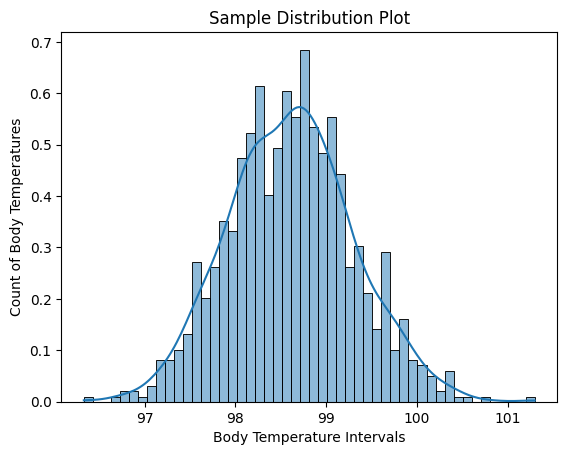

In [4]:
sns.histplot(data=array, bins=50, stat='density', kde=True)
plt.xlabel('Body Temperature Intervals')
plt.ylabel('Count of Body Temperatures')
plt.title('Sample Distribution Plot')
plt.show()

## Fitting the best probability distibution to the dataset-

The bell curve narrow downs the possible distributions

In [5]:
f = Fitter(data=array, distributions=['norm','gamma','beta','binomial'])
f.fit()

,sumsquare_error,aic,bic,kl_div
gamma,0.471945,553.498518,-7637.925519,inf
beta,0.472598,554.596229,-7629.634906,inf
norm,0.474932,558.474033,-7638.523117,inf
binomial,inf,inf,inf,inf


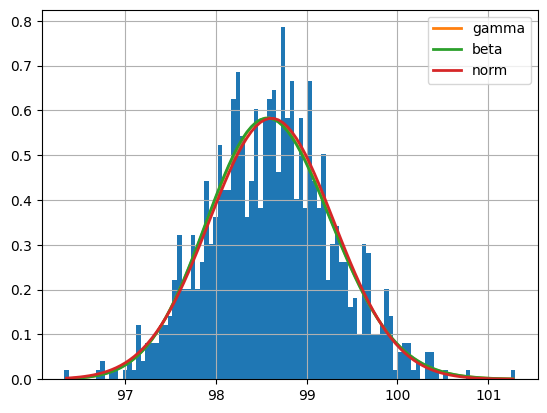

In [6]:
f.summary()

The best-fit distribution:

In [7]:
f.get_best()

{'gamma': {'a': 312.67776317591745,
  'loc': 86.49938822098503,
  'scale': 0.03874322247561911}}

Get the parameters of the best-fit distribution:

In [8]:
parameters = f.fitted_param['gamma']
a, loc, scale = parameters[0], parameters[1], parameters[2]

## Validating the Sample distribution VS Gamma distribution-

In [9]:
x_values = [97,97.5,98,98.5,99,99.5,100,100.5,101,101.5]

**Sample** conditional probabilities:

In [10]:
for _ in x_values:
    print(f'P(Body_Temperature<={_}) = {len(array[array<=_])/1000}')

P(Body_Temperature<=97) = 0.007
P(Body_Temperature<=97.5) = 0.046
P(Body_Temperature<=98) = 0.183
P(Body_Temperature<=98.5) = 0.434
P(Body_Temperature<=99) = 0.717
P(Body_Temperature<=99.5) = 0.899
P(Body_Temperature<=100) = 0.976
P(Body_Temperature<=100.5) = 0.997
P(Body_Temperature<=101) = 0.999
P(Body_Temperature<=101.5) = 1.0


**Gamma** conditional probabilities:

In [11]:
for _ in x_values:
    print(f'P(Body_Temperature<={_}) = {sps.gamma.cdf(_, a, loc, scale)}')

P(Body_Temperature<=97) = 0.007148967804747892
P(Body_Temperature<=97.5) = 0.04855297058824962
P(Body_Temperature<=98) = 0.1861413370730672
P(Body_Temperature<=98.5) = 0.4414185241551794
P(Body_Temperature<=99) = 0.718040286039415
P(Body_Temperature<=99.5) = 0.9001511716552462
P(Body_Temperature<=100) = 0.9755830025363084
P(Body_Temperature<=100.5) = 0.9958673601366558
P(Body_Temperature<=101) = 0.999510390723578
P(Body_Temperature<=101.5) = 0.9999587716401848


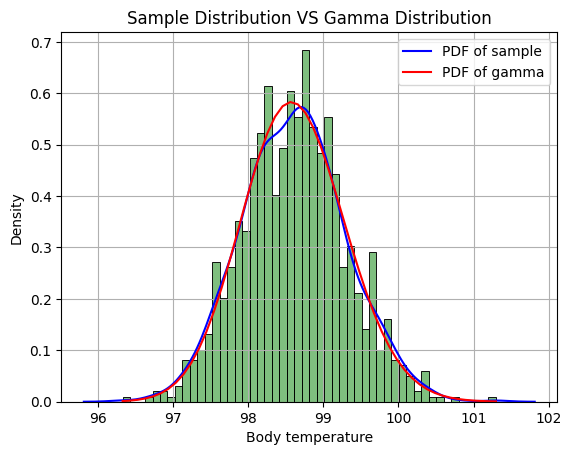

In [12]:
sns.histplot(data=array, bins=50, alpha=0.5, stat='density', color='g')
sns.kdeplot(data=array, label='PDF of sample', color='b')

_ = np.linspace(min(array), max(array), 50)
pdf_gamma = sps.gamma.pdf(_,a,loc,scale)
plt.plot(_, pdf_gamma, label='PDF of gamma', color='r', linewidth=1.5)

plt.legend()
plt.grid(True)
plt.xlabel('Body temperature')
plt.title('Sample Distribution VS Gamma Distribution')
plt.show()